In [1]:
import pandas as pd

df = pd.DataFrame({
    '키'         : [1.6,1.6,1.5,1.8, 1.3, 1.6],
    '좋아하는 색':['파랑','초록','파랑','초록','분홍','파랑'],
    '성'         :['M','F','F','M','M','F'],
    '몸무게'     :[88,76,56,80,30,52]})

df = pd.get_dummies(df)

print(df)

     키  몸무게  좋아하는 색_분홍  좋아하는 색_초록  좋아하는 색_파랑  성_F  성_M
0  1.6   88          0          0          1    0    1
1  1.6   76          0          1          0    1    0
2  1.5   56          0          0          1    1    0
3  1.8   80          0          1          0    0    1
4  1.3   30          1          0          0    0    1
5  1.6   52          0          0          1    1    0


In [2]:
import numpy as np

input = df.loc[:,df.columns!='몸무게']
target = df['몸무게']

F0 = np.mean(target)

print(F0)

63.666666666666664


In [3]:
r1 = target - F0

print(r1)

0    24.333333
1    12.333333
2    -7.666667
3    16.333333
4   -33.666667
5   -11.666667
Name: 몸무게, dtype: float64


In [4]:
from sklearn.tree import DecisionTreeRegressor

tree1  = DecisionTreeRegressor (max_depth=2, random_state=42)

r1_fit = tree1.fit(input, r1)

gamma1  = r1_fit.predict(input)

print ('잔차 예측값:{}'.format(np.unique(gamma1)))

잔차 예측값:[-33.66666667  -2.33333333  20.33333333]


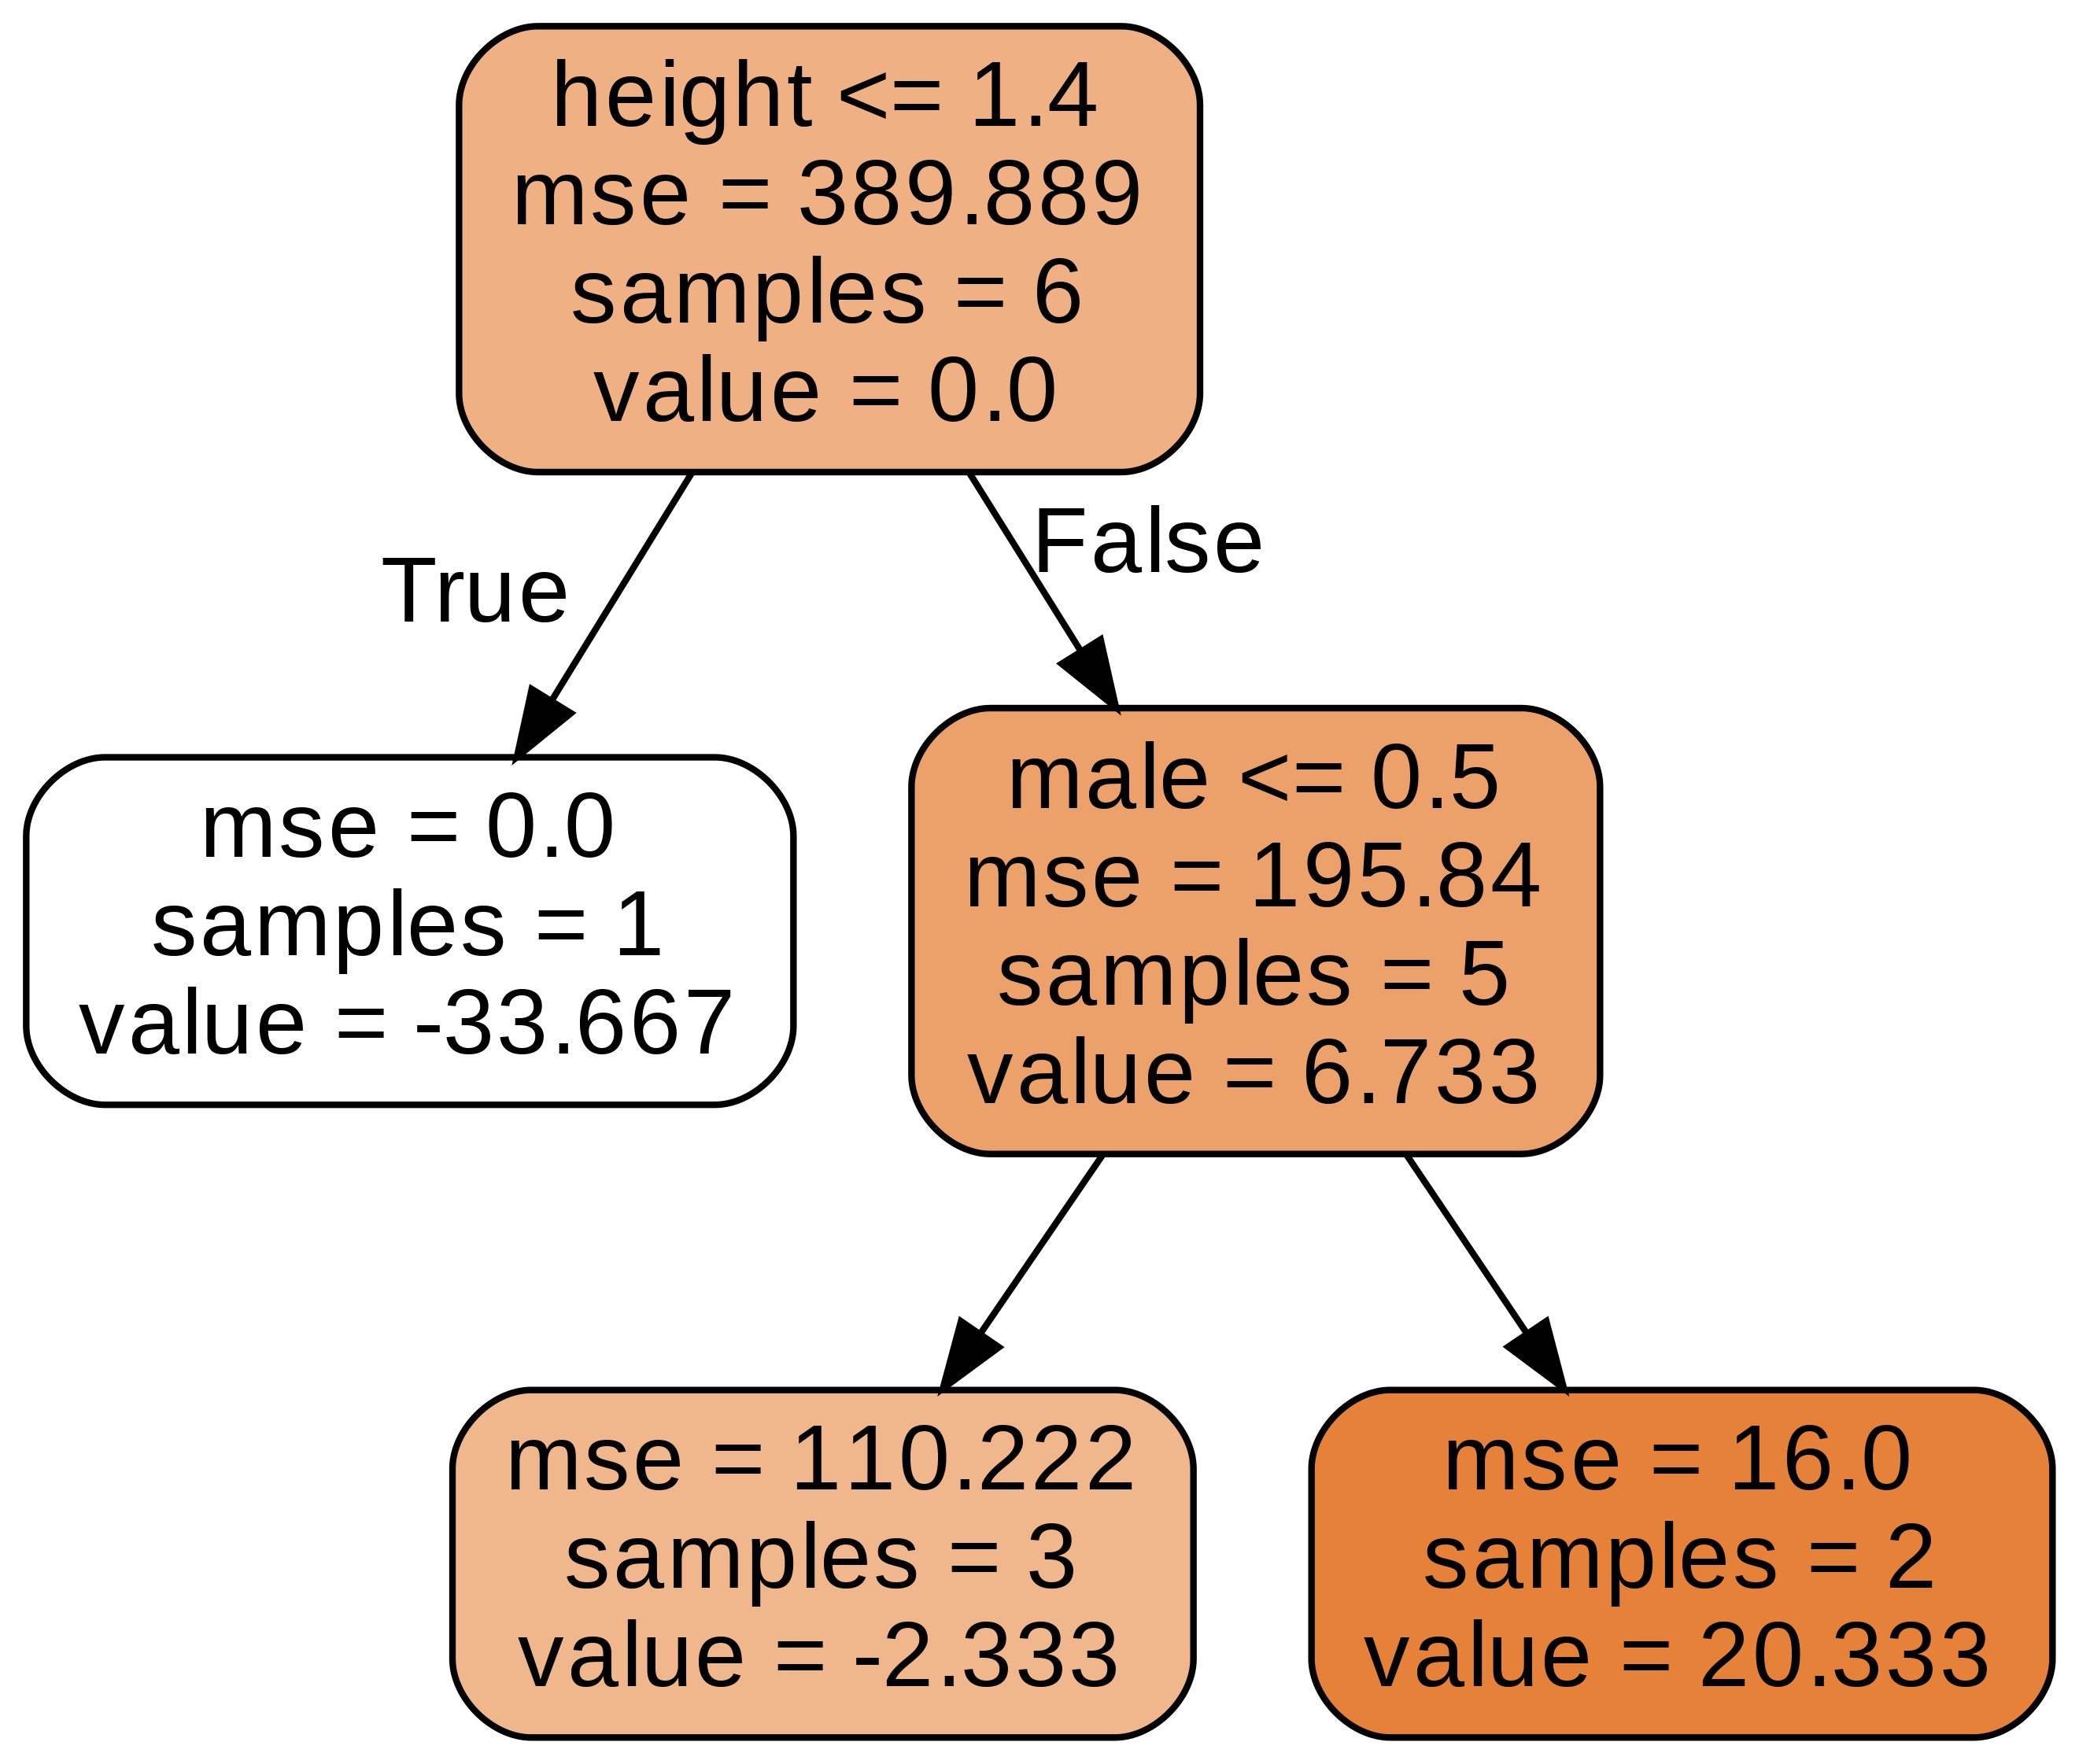

In [5]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree1,
    out_file="img/tree.dot",
    feature_names=['height','pink','green','blue','female','male'],
    class_names='몸무게',
    rounded=True,
    filled=True
)

from subprocess import call
call(['dot', '-Tpng', 'img/tree.dot', '-o', 'img/decistion-tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'img/decistion-tree.png')

In [6]:
eta = 0.1
F1 = F0 + eta * gamma1

print ('첫번째 예측값:{}'.format(F1))

첫번째 예측값:[65.7        63.43333333 63.43333333 65.7        60.3        63.43333333]


In [7]:
F_new = np.mean(target)

tree = DecisionTreeRegressor(max_depth=2, random_state=42)

eta = 0.1

for t in range(100):
    print(str(t+1)+'번째 업데이트')

    F_old = F_new
    r     = target - F_old
    r_fit = tree.fit(input,r)
    gamma = r_fit.predict(input)

    print('잔차 예측값:{}'.format(np.round(np.unique(gamma),2)))

    F_new = F_old + eta * gamma

    print('예측값:{}'.format(np.round(F_new,2)))

1번째 업데이트
잔차 예측값:[-33.67  -2.33  20.33]
예측값:[65.7  63.43 63.43 65.7  60.3  63.43]
2번째 업데이트
잔차 예측값:[-30.3  -2.1  18.3]
예측값:[67.53 63.22 63.22 67.53 57.27 63.22]
3번째 업데이트
잔차 예측값:[-27.27  -1.89  16.47]
예측값:[69.18 63.03 63.03 69.18 54.54 63.03]
4번째 업데이트
잔차 예측값:[-24.54  -7.03   0.97  14.82]
예측값:[70.66 63.13 62.33 70.66 52.09 63.13]
5번째 업데이트
잔차 예측값:[-22.09  -6.33   0.87  13.34]
예측값:[71.99 63.22 61.7  71.99 49.88 63.22]
6번째 업데이트
잔차 예측값:[-19.88  -5.7    0.78  12.01]
예측값:[73.19 63.3  61.13 73.19 47.89 63.3 ]
7번째 업데이트
잔차 예측값:[-17.89  -5.13   0.7   10.81]
예측값:[74.27 63.37 60.62 74.27 46.1  63.37]
8번째 업데이트
잔차 예측값:[-16.1   -4.62   0.63   9.73]
예측값:[75.25 63.43 60.15 75.25 44.49 63.43]
9번째 업데이트
잔차 예측값:[-14.49  -4.15   0.57   8.75]
예측값:[76.12 63.49 59.74 76.12 43.04 63.49]
10번째 업데이트
잔차 예측값:[-13.04  -3.74   0.2    8.2 ]
예측값:[76.14 64.31 59.36 76.94 41.74 63.51]
11번째 업데이트
잔차 예측값:[-11.74  -3.36   0.09   7.46]
예측값:[76.89 64.32 59.03 77.69 40.56 63.52]
12번째 업데이트
잔차 예측값:[-10.56  -1.14   2.31  11.68]
예측값:[76